In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/clean/visits.csv")

df["date_time"] = pd.to_datetime(df["date_time"])
df.head()

,id,client_id,visitor_id,visit_id,process_step,date_time
0,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,3,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,4,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,5,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [3]:
df_visits = df.groupby(["client_id", "visitor_id", "visit_id", "process_step"]).agg({"date_time": "max"}).reset_index()

In [4]:
df_visits.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
1,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
2,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
3,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
4,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05


In [5]:
df_experiments = pd.read_csv("../data/clean/experiments.csv")
df_experiments.head()

,id,client_id,variation
0,1,9988021,Test
1,2,8320017,Test
2,3,4033851,Control
3,4,1982004,Test
4,5,9294070,Control


In [6]:
df_visits = df_visits.merge(df_experiments, on="client_id", how="left")
df_visits.head()

,client_id,visitor_id,visit_id,process_step,date_time,id,variation
0,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,58723.0,Control
1,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,58723.0,Control
2,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,58723.0,Control
3,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,58723.0,Control
4,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,58723.0,Control


In [7]:
df_control = df_visits[df_visits["variation"] == "Control"].drop(columns=["id", "variation"])
df_test = df_visits[df_visits["variation"] == "Test"].drop(columns=["id", "variation"])

print(df_control.head())
print(df_test.head())

   client_id             visitor_id                      visit_id  \
0        169  201385055_71273495308  749567106_99161211863_557568   
1        169  201385055_71273495308  749567106_99161211863_557568   
2        169  201385055_71273495308  749567106_99161211863_557568   
3        169  201385055_71273495308  749567106_99161211863_557568   
4        169  201385055_71273495308  749567106_99161211863_557568   

  process_step           date_time  
0      confirm 2017-04-12 20:23:09  
1        start 2017-04-12 20:19:36  
2       step_1 2017-04-12 20:19:45  
3       step_2 2017-04-12 20:20:31  
4       step_3 2017-04-12 20:22:05  
    client_id             visitor_id                      visit_id  \
11        555  402506806_56087378777  637149525_38041617439_716659   
12        555  402506806_56087378777  637149525_38041617439_716659   
13        555  402506806_56087378777  637149525_38041617439_716659   
14        555  402506806_56087378777  637149525_38041617439_716659   
15        555

In [8]:
import matplotlib.pyplot as plt

steps = ["start", "step_1", "step_2", "step_3", "confirm"]
compare = "start"

df_control_completion_rates = [100 * len(df_control[df_control["process_step"] == step]) / len(df_control[df_control["process_step"] == compare]) for step in steps]
df_control_completion_rates = pd.Series(df_control_completion_rates, index=steps)

df_test_completion_rates = [100 * len(df_test[df_test["process_step"] == step]) / len(df_test[df_test["process_step"] == compare]) for step in steps]
df_test_completion_rates = pd.Series(df_test_completion_rates, index=steps)
df_test_completion_rates.head()

start      100.000000
step_1      85.327674
step_2      73.939613
step_3      66.955658
confirm     65.598001
dtype: float64

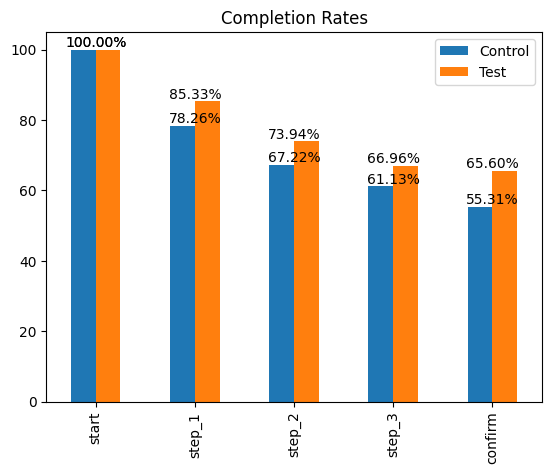

In [9]:
df_completion_rates = pd.DataFrame({ "Control": df_control_completion_rates, "Test": df_test_completion_rates })
df_completion_rates.plot(kind="bar", title="Completion Rates");

for i, value in enumerate(df_completion_rates["Control"]): plt.text(i, value, f"{value:.2f}%", ha="center", va="bottom")
for i, value in enumerate(df_completion_rates["Test"]): plt.text(i, value, f"{value:.2f}%", ha="center", va="bottom")

In [10]:
process_step_mapper = {
    "start": 0,
	"step_1": 1,
	"step_2": 2,
	"step_3": 3,
	"confirm": 4
}

df_visits["process_step_value"] = df_visits["process_step"].map(process_step_mapper)
df_visits.sort_values(["client_id", "visitor_id", "visit_id", "process_step_value"], inplace=True)

df_visits.head()

,client_id,visitor_id,visit_id,process_step,date_time,id,variation,process_step_value
1,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,58723.0,Control,0
2,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,58723.0,Control,1
3,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,58723.0,Control,2
4,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,58723.0,Control,3
0,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,58723.0,Control,4


In [11]:
df_control_duration = df_control.copy()

df_control_duration["process_step_value"] = df_visits["process_step"].map(process_step_mapper)
df_control_duration.sort_values(["client_id", "visitor_id", "visit_id", "process_step_value"], inplace=True)

df_control_duration["time_spent"] = df_control_duration.groupby(["client_id", "visitor_id", "visit_id"])["date_time"].diff().dt.total_seconds()
df_control_duration["time_spent"] = df_control_duration["time_spent"].fillna(0)

df_control_duration["time_spent_cumulative"] = df_control_duration.groupby(["client_id", "visitor_id", "visit_id"])["time_spent"].cumsum()

control_duration = df_control_duration.groupby(["process_step"]).agg({ "time_spent_cumulative": "mean" }).reset_index().sort_values("process_step", key=lambda x: x.map(process_step_mapper))
control_duration = pd.Series(control_duration["time_spent_cumulative"].values, index=control_duration["process_step"])
control_duration

process_step
start        0.000000
step_1      15.070534
step_2      51.519662
step_3     153.689493
confirm    286.268528
dtype: float64

In [12]:
df_test_duration = df_test.copy()

df_test_duration["process_step_value"] = df_visits["process_step"].map(process_step_mapper)
df_test_duration.sort_values(["client_id", "visitor_id", "visit_id", "process_step_value"], inplace=True)

df_test_duration["time_spent"] = df_test_duration.groupby(["client_id", "visitor_id", "visit_id"])["date_time"].diff().dt.total_seconds()
df_test_duration["time_spent"] = df_test_duration["time_spent"].fillna(0)

df_test_duration["time_spent_cumulative"] = df_test_duration.groupby(["client_id", "visitor_id", "visit_id"])["time_spent"].cumsum()

test_duration = df_test_duration.groupby(["process_step"]).agg({ "time_spent_cumulative": "mean" }).reset_index().sort_values("process_step", key=lambda x: x.map(process_step_mapper))
test_duration = pd.Series(test_duration["time_spent_cumulative"].values, index=test_duration["process_step"].values)
test_duration

start        0.000000
step_1       3.493879
step_2      42.629428
step_3     139.779022
confirm    264.113717
dtype: float64

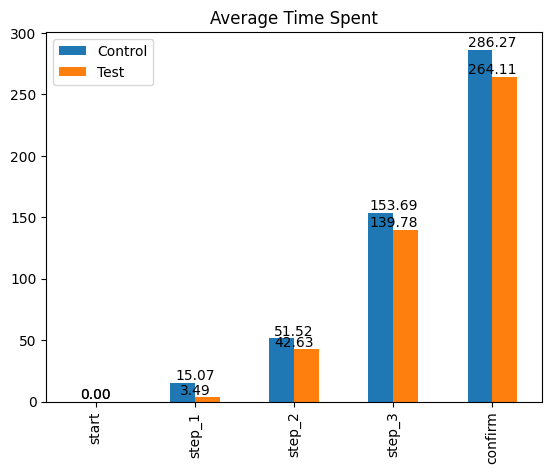

In [13]:
df_duration = pd.DataFrame({ "Control": control_duration, "Test": test_duration })
df_duration.plot(kind="bar", title="Average Time Spent");

for i, value in enumerate(df_duration["Control"]): plt.text(i, value, f"{value:.2f}", ha="center", va="bottom")
for i, value in enumerate(df_duration["Test"]): plt.text(i, value, f"{value:.2f}", ha="center", va="bottom")

In [14]:
df_control_transitions = df_control.copy()
df_control_transitions["process_step_value"] = df_control_transitions["process_step"].map(process_step_mapper)

df_control_backwards = df_control_transitions.copy()
df_control_backwards["error"] = df_control_transitions["process_step_value"].diff() == -1
df_control_backwards = df_control_backwards[df_control_backwards["error"] == True]

total_test_transitions = len(df_control_transitions[df_control_transitions["process_step"] != "start"])
control_transitions = 100 * len(df_control_backwards) / total_test_transitions
control_transitions

2.2107237303686116

In [15]:
df_test_transitions = df_test.copy()
df_test_transitions["process_step_value"] = df_test_transitions["process_step"].map(process_step_mapper)

df_test_backwards = df_test_transitions.copy()
df_test_backwards["error"] = df_test_transitions["process_step_value"].diff() == -1
df_test_backwards = df_test_backwards[df_test_backwards["error"] == True]

total_control_transitions = len(df_test_transitions[df_test_transitions["process_step"] != "start"])
test_transitions = 100 * len(df_test_backwards) / total_control_transitions
test_transitions

1.944501753662059